In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('./data/teleco_user_data.txt')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df = pd.get_dummies(df
                    , columns = ['gender'
                                 , 'SeniorCitizen'
                                 , 'Partner'
                                 , 'Dependents'
                                 , 'PhoneService'
                                 , 'MultipleLines'
                                 , 'InternetService'
                                 , 'OnlineSecurity'
                                 , 'OnlineBackup'
                                 , 'DeviceProtection'
                                 , 'TechSupport'
                                 , 'StreamingTV'
                                 , 'StreamingMovies'
                                 , 'Contract'
                                 , 'PaperlessBilling'
                                 , 'PaymentMethod']
                   )

In [7]:
df.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,No,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,34,56.95,1889.5,No,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,Yes,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,45,42.30,1840.75,No,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,2,70.70,151.65,Yes,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [8]:
# get churn numbers
df['ChurnNums'] = df.Churn.apply(lambda x: 0 if x == 'No' else 1)
df.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,ChurnNums
0,7590-VHVEG,1,29.85,29.85,No,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
1,5575-GNVDE,34,56.95,1889.5,No,0,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
2,3668-QPYBK,2,53.85,108.15,Yes,0,1,1,0,1,...,1,0,0,0,1,0,0,0,1,1
3,7795-CFOCW,45,42.30,1840.75,No,0,1,1,0,1,...,0,1,0,1,0,1,0,0,0,0
4,9237-HQITU,2,70.70,151.65,Yes,1,0,1,0,1,...,1,0,0,0,1,0,0,1,0,1


In [9]:
df = df.drop('Churn', axis = 1)
df.head()

,customerID,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,ChurnNums
0,7590-VHVEG,1,29.85,29.85,1,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0
1,5575-GNVDE,34,56.95,1889.5,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,3668-QPYBK,2,53.85,108.15,0,1,1,0,1,0,...,1,0,0,0,1,0,0,0,1,1
3,7795-CFOCW,45,42.30,1840.75,0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,0,0
4,9237-HQITU,2,70.70,151.65,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,1


In [10]:
type(df['TotalCharges'].iloc[0])

str

In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   tenure                                   7043 non-null   int64  
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   gender_Female                            7043 non-null   uint8  
 5   gender_Male                              7043 non-null   uint8  
 6   SeniorCitizen_0                          7043 non-null   uint8  
 7   SeniorCitizen_1                          7043 non-null   uint8  
 8   Partner_No                               7043 non-null   uint8  
 9   Partner_Yes                              7043 non-null   uint8  
 10  Dependents_No                            7043 no

### TotalCharges have nulls

In [13]:
df[df.TotalCharges.isna()]

,customerID,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,ChurnNums
488,4472-LVYGI,0,52.55,NaN,1,0,1,0,0,1,...,0,0,1,0,1,1,0,0,0,0
753,3115-CZMZD,0,20.25,NaN,0,1,1,0,1,0,...,0,0,1,1,0,0,0,0,1,0
936,5709-LVOEQ,0,80.85,NaN,1,0,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0
1082,4367-NUYAO,0,25.75,NaN,0,1,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0
1340,1371-DWPAZ,0,56.05,NaN,1,0,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0
3331,7644-OMVMY,0,19.85,NaN,0,1,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0
3826,3213-VVOLG,0,25.35,NaN,0,1,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0
4380,2520-SGTTA,0,20.00,NaN,1,0,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0
5218,2923-ARZLG,0,19.70,NaN,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
6670,4075-WKNIU,0,73.35,NaN,1,0,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0


In [14]:
print(df.MonthlyCharges.mean(), df.MonthlyCharges.std())
print(df.TotalCharges.mean(), df.TotalCharges.std())

64.76169246059918 30.090047097678493
2283.3004408418656 2266.771361883145


### Drop rows where TotalCharges have nulls

In [15]:
df = df[df.TotalCharges.notnull()]
df.isna().sum()

customerID                                 0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
gender_Female                              0
gender_Male                                0
SeniorCitizen_0                            0
SeniorCitizen_1                            0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecu

In [16]:
"""
Given the following dataset, can you create a decision tree 
to predict customer churn? For simplicity, you can set the 
maximum depth of the decision tree to 4. For the purpose of 
this exercise, you do not need to optimize the model.

Solution will create a model and decision tree using Python, 
then discuss interpreting the output.
"""

from sklearn.model_selection import (train_test_split
                                     , GridSearchCV
                                     , cross_val_score
                                    )
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (roc_auc_score
                             , precision_score
                             , recall_score
                             , roc_curve
                             , confusion_matrix
                             , plot_confusion_matrix
                             , precision_recall_curve
                             , auc
                            )

In [17]:
X = df.drop(['customerID', 'ChurnNums'], axis = 1)
y = df.ChurnNums

In [18]:
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,1,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [19]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: ChurnNums, Length: 7032, dtype: int64

In [20]:
X.isna().sum()

tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
gender_Female                              0
gender_Male                                0
SeniorCitizen_0                            0
SeniorCitizen_1                            0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBack

In [21]:
len(X.columns)

46

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X
                                                    , y
                                                    , test_size = 0.2
                                                    , random_state = 42
                                                   )

### Grid Search

In [23]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [24]:
# takes 17 minutes to run!
#
# grid = {'bootstrap': [True, False]
#          , 'n_estimators': [x for x in range(5, 125, 25)]
#          , 'max_depth': [x for x in range(1, 5)]
#          , 'max_features': [x for x in range(1, 47, 9)]
#          , 'min_samples_leaf': [x for x in range(1, 5)]
#          , 'min_samples_split': [x for x in range(1, 5)]
#         }

# rf_grid_search = GridSearchCV(estimator = RandomForestClassifier()
#                                , param_grid = grid
#                                , cv = 7
#                                , n_jobs = -1
#                                , verbose = 1
#                               )

# rf_grid_search.fit(X_train, y_train)

In [25]:
# rf_grid_search.best_params_

In [26]:
# Best Parameters for rfc
'''
{'bootstrap': True,
 'max_depth': 4,
 'max_features': 28,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 5}
'''

"\n{'bootstrap': True,\n 'max_depth': 4,\n 'max_features': 28,\n 'min_samples_leaf': 2,\n 'min_samples_split': 3,\n 'n_estimators': 5}\n"

### Save Best Parameters

In [27]:
# skip already done!
#
# import joblib
# joblib.dump(rfc_grid_search.best_params_
#             , './model_parameters/rfc_teleco.pkl'
#             , compress = 1
#            )

### Load Beset Parameters

In [28]:
import joblib

rfc = RandomForestClassifier(random_state = 42
                             , n_jobs = -1
                             , verbose = 0
                            ).set_params(**joblib.load('./model_parameters/rfc_teleco.pkl'))

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

y_probs = rfc.predict_proba(X_test)[:, 1]

### Cross Val Score

In [29]:
cval = cross_val_score(rfc
                       , X_train
                       , y_train
                       , scoring = 'accuracy'
                       , cv = 7
                      )
print(f'7 Fold Cross-Validation Score: {np.mean(cval)}')

7 Fold Cross-Validation Score: 0.794139071587446


### ROC Curve

In [30]:
roc_score = roc_auc_score(y_test
                          , y_probs
                         )
print(f'ROC AUC Score: {roc_score}')

ROC AUC Score: 0.8175373115012088


In [31]:
def ROC(y_test, y_probs):
    """
    Inputs: y_test from train_test_split
            , y_probs from model.repdict_proba(X_test)[:, 1]
        
    Output: (None) Plots ROC Curve with roc_auc_score
    """
    # imports
    import matplotlib.pyplot as plt
    plt.style.use('fivethirtyeight')
    from sklearn.metrics import roc_auc_score, roc_curve
    
    # roc_score
    roc_score = roc_auc_score(y_test
                          , y_probs
                         )
    
    # Specific plot parameters
    plt.rcParams['font.size'] = 16
    plt.figure(figsize=(10,8))

    # No Skill Line Data
    base_fpr, base_tpr, _ = roc_curve(y_test
                                      , [1 for _ in range(len(y_test))]
                                     ) 

    # Model Data
    model_fpr, model_tpr, _ = roc_curve(y_test
                                        , y_probs
                                       )
    # Plot no skill
    plt.plot(base_fpr
             , base_tpr
             , 'b'
             , label='No Skill'
            )
    
    # Plot roc_curve
    plt.plot(model_fpr
             , model_tpr
             , 'r'
             , label='RFC Model'
            )
    
    # Plot labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve, Accuracy: {round(roc_score, 3)}')
    plt.legend();

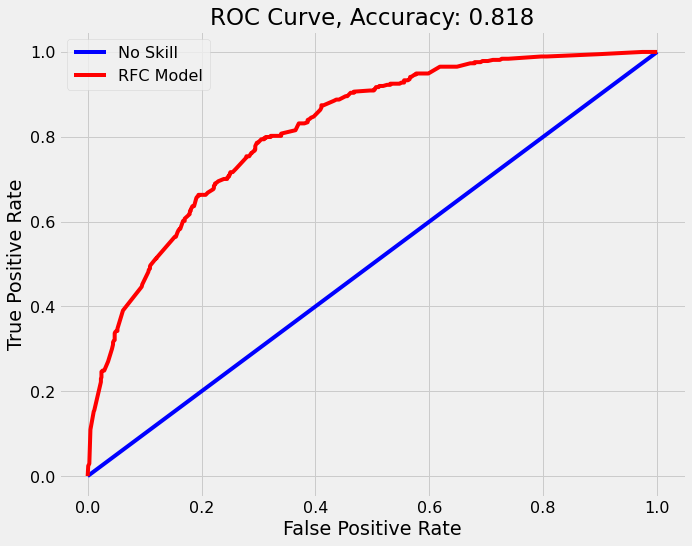

In [32]:
ROC(y_test, y_probs)

In [33]:
### Precision Recall Curve

def pr_curve(y_test, y_probs):
    """
    Inputs: y_test from train_test_split
            , y_probs from model.predict_proba(X_test)[:, 1]
            
    Outputs: (None) Plots Precision Recall Curve with accuaracy auc_score
    """
    
    # Imports
    import matplotlib.pyplot as plt
    plt.rcParams['font.size'] = 16
    plt.figure(figsize=(10, 8))    
    from sklearn.metrics import precision_recall_curve, auc
    
    # Precision Recall Curve
    rf_prec, rf_recall, _ = precision_recall_curve(y_test
                                                   , y_probs
                                                  )
    # Auc Score
    auc_score = auc(rf_recall, rf_prec)
    
    # No Skill Line
    plt.plot([0, 0]
             , linestyle = '--'
             , color = 'b'
             , label = 'No Skill'
            )

    # PR Line
    plt.plot(rf_recall
             , rf_prec
             , color = 'r'
             , label = 'Random Forest'
            )
    
    # Labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve, Accuracy: {round(auc_score, 3)}')
    plt.legend();

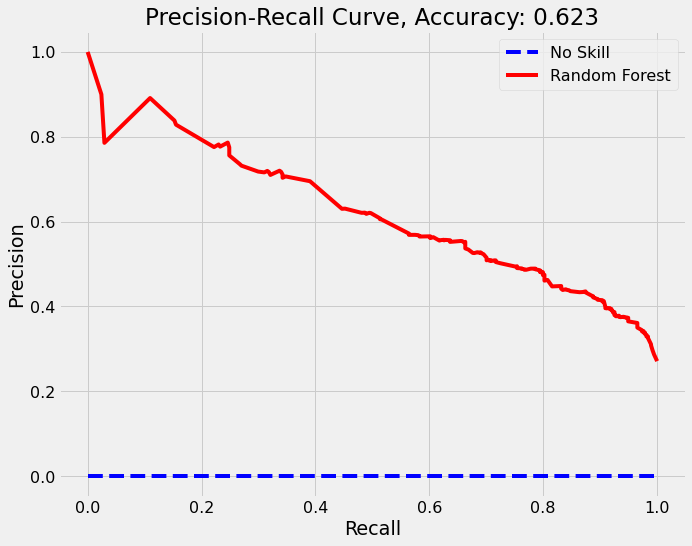

In [34]:
pr_curve(y_test, y_probs)

In [35]:
def confusion_mat(X_test, y_test, model):
    """
    Inputs: X_test, y_test from train_test_split
            , model from trained model, RandomForestClassifier as rfc
    
    Outputs: (None) Plots Confusion Matrix
    """
    
    # Imports 
    import matplotlib.pyplot as plt
    plt.rcParams['figure.figsize'] = (5, 4)
    plt.rcParams['font.size'] = 16
    from sklearn.metrics import plot_confusion_matrix
    
    # Confusion Matrix
    
    disp = plot_confusion_matrix(model
                                 , X_test
                                 , y_test
                                 , cmap = plt.cm.Blues
                                 , normalize = 'true'
                                )
    
    # Plot settings
    disp.ax_.grid(False)
    disp.ax_.set_title(f'Model Confusion Matrix');

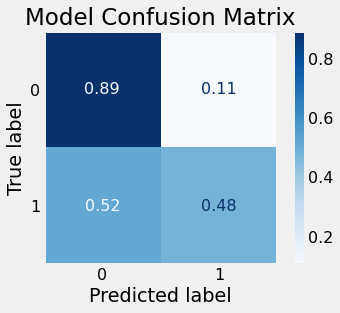

In [36]:
confusion_mat(X_test, y_test, rfc)

### Make A Prediction

In [37]:
last_test_value = X_test.iloc[-1]
last_test_value

tenure                                       72.00
MonthlyCharges                               25.10
TotalCharges                               1857.85
gender_Female                                 1.00
gender_Male                                   0.00
SeniorCitizen_0                               1.00
SeniorCitizen_1                               0.00
Partner_No                                    0.00
Partner_Yes                                   1.00
Dependents_No                                 0.00
Dependents_Yes                                1.00
PhoneService_No                               0.00
PhoneService_Yes                              1.00
MultipleLines_No                              0.00
MultipleLines_No phone service                0.00
MultipleLines_Yes                             1.00
InternetService_DSL                           0.00
InternetService_Fiber optic                   0.00
InternetService_No                            1.00
OnlineSecurity_No              

In [38]:
def predict(value, model):
    """
    Inputs: value from X_test datafram table ex: X_test.iloc[-1]
            , model, intantiated ex: rfc for RandomForestClassifier
    
    Output: returns churn or no churn
    """
    
    if model.predict(np.array(value).reshape(1,-1))[0] == 1:
        return f'Predicted Churn'
    else: 
        return f'No Churn Predicted'
    

In [39]:
predict(X_test.iloc[-1], rfc)

'No Churn Predicted'